# Python library : torch_hog

The torch_hog library provides implementation for calculating the Histogram Of Oriented Gradients feature descriptors.


# References :

- [KNN] "Histograms of Oriented Gradients for Human Detection" Navneet Dalal and Bill Triggs - https://lear.inrialpes.fr/people/triggs/pubs/Dalal-cvpr05.pdf



# Install library


In [1]:
%%bash
if !python -c "import torch_hog" 2>/dev/null; then
    pip install https://github.com/Simon-Bertrand/HOG-PyTorch/archive/main.zip
fi

# Import library


In [2]:
import torch_hog

# Load data and and compute ground truth

In [3]:
!pip install -q scikit-image


[notice] A new release of pip available: 22.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [11]:
from skimage import feature
from skimage import data
import numpy as np
import torch
import torch_hog
image = data.astronaut().astype(np.float32)
im = torch.Tensor(image).moveaxis(-1, 0).unsqueeze(0)

featuresGt, hogImFt = feature.hog(
    image,
    orientations=9,
    pixels_per_cell=(16, 16),
    cells_per_block=(2, 2),
    block_norm="L2",
    visualize=True,
    channel_axis=-1,
    feature_vector=False,
)
hog = torch_hog.HOG(
    cellSize=16,
    blockSize=2,
    kernel="finite",
    normalization="L2",
    accumulate="simple",
    channelWise=False,
)
hogIm = hog.visualize(im, orthogonal=True)

# Visualization comparison with skimage

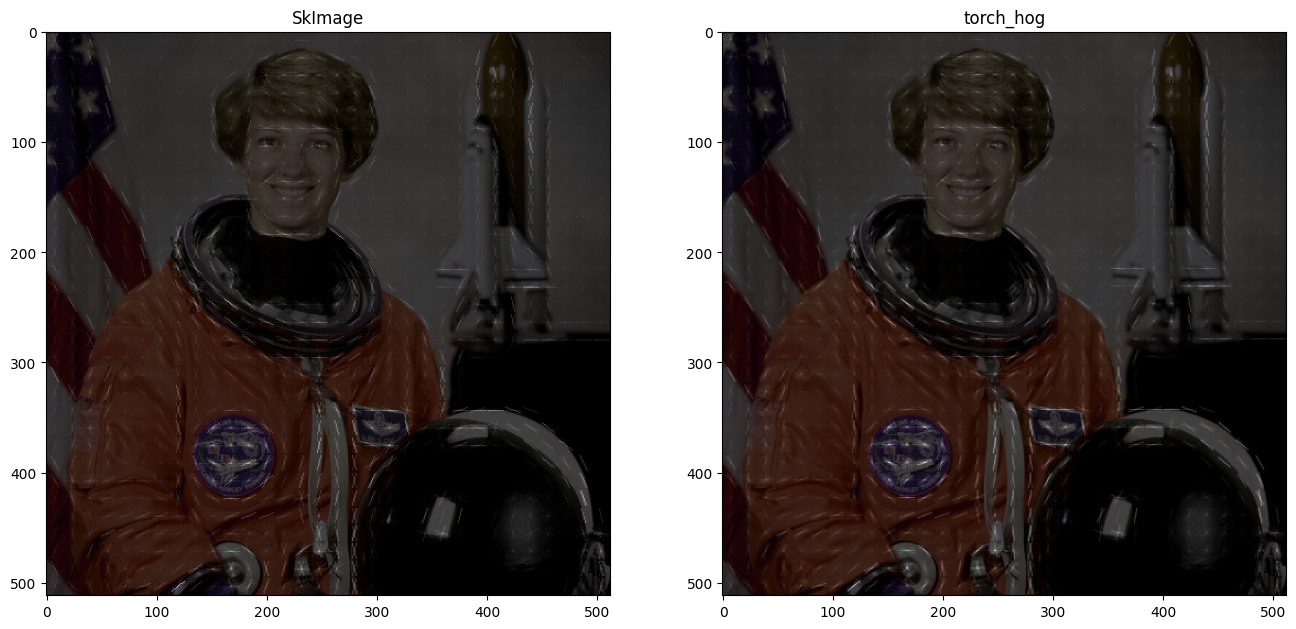

In [12]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(16, 16))

axes[0].imshow(image / 255)
axes[0].set_title("SkImage")
axes[0].imshow(
    hogImFt, cmap="gray", alpha=0.75
)  
axes[1].imshow(image / 255)
axes[1].set_title("torch_hog")
axes[1].imshow(
    hogIm[0,0], cmap="gray", alpha=0.75
)  

# Testing with skimage

In [13]:
features = hog(im)
assert (features[0,0]-torch.Tensor(featuresGt)).abs().max()<1e-6
(features[0,0]-torch.Tensor(featuresGt)).mean()

tensor(3.1590e-10)

# Visualize on max norm channel

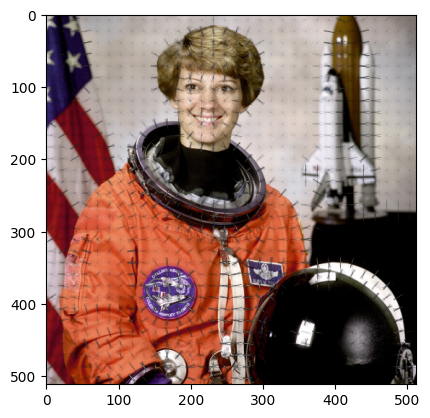

In [14]:
hog = torch_hog.HOG(
    cellSize=16,
    blockSize=2,
    kernel="finite",
    normalization="L2",
    accumulate="simple",
    channelWise=False,
)
hogIm = hog.plotVisualize(im)

# Visualize channel wise

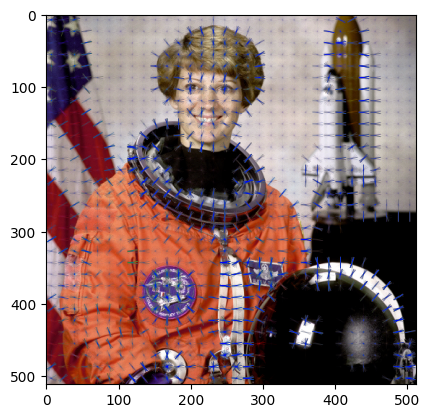

In [15]:
hog = torch_hog.HOG(
    cellSize=16,
    blockSize=2,
    kernel="finite",
    normalization="L2",
    accumulate="simple",
    channelWise=True,
)
hogIm = hog.plotVisualize(im)

# Bilinear accumulating

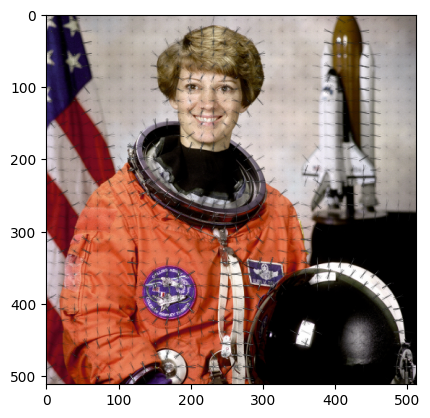

In [17]:
hog = torch_hog.HOG(
    cellSize=16,
    blockSize=2,
    kernel="finite",
    normalization="L2",
    accumulate="bilinear",
    channelWise=False,
)
hogIm = hog.plotVisualize(im)